Alice and Bob want to exchange a shift cipher key using the Diffie-Hellman key exchange protocol. They agree to use the prime $p = 11$ for their cyclic group $Z^{∗}_{11}$, and $g = 7$ as the generator.

a) Assume now that Alice uses the secret value $a = 6$ and Bob uses the secret value $b = 9$. Compute the intermediate values and the final key that Alice and Bob exchange.

b) Assume that Alice and Bob exchange the values 
$$X = g^{a} = 5 \mod 11 $$
$$Y = g^{b}= 10 \mod 11$$
.Determine the secret key they both exchanged!

(Note: The values of $a$ and $b$ are NOT the same as in Exercise 1a)


c) Decrypt the following message that was encrypted using a shift cipher. The key exchanged in Exercise 3b was used to encrypt the message.

TVFEFKBDLFUXJUIDBOEZTUSJQFMJOJOH

For the first part we will first compute the public keys:
$$
PK_{Alice} = g ^ a \mod p
$$
$$
PK_{Bob} = g ^ b \mod p
$$
And then just cumpute the share key:
$$
K = PK_{Alice} ^ b \mod p = PK_{Bob} ^ a \mod p = 3
$$

In [4]:
g, p, a, b = 7, 11, 6, 9
A, B = pow(g, a, p), pow(g, b, p)
X, Y, Z = pow(B, a, p), pow(A, b, p), pow(g, a*b, p)
if X == Y == Z:
    print("Shared key: ", X)
else:
    print("Something went wrong: Keys are not equal")

Shared key:  3


This next section requires the same procedure with the addition of not knowing previously the $a, b$ values.
To work around this problem we will implement a loop that will first check the conditions 
$$X = g^a = 5 \mod 11 \text{ and } Y = g^b= 10 \mod 11$$
are met.

In [2]:
# All combinations of a and b

ab_conv = [[a, b] for a in range(1, 11) for b in range(1, 11)]

while ab_conv:
    a, b = ab_conv.pop()
    if(pow(g, a, 11) == 5 and pow(g, b, 11) == 10):
        A, B = pow(g, a, p), pow(g, b, p)
        X, Y = pow(B, a, p), pow(A, b, p)
        if X == Y:
            print("a:", a, "b:", b)
            print("Shared key:", X)
            break
        else:
            print("Something went wrong: Keys are not equal")

a: 2 b: 5
Shared key: 1


Once the key is obtained, we just need to decrypt the message with a simple shift decipher method:

In [3]:
def decipher(message, shift):
    decrypted = ""
    for i in range(len(message)):
        char = message[i]
        if (char.isupper()):
            decrypted += chr((ord(char) - shift - 65) % 26 + 65)
        else:
            decrypted += chr((ord(char) - shift - 97) % 26 + 97)
    return decrypted

c = "TVFEFKBDLFUXJUIDBOEZTUSJQFMJOJOH"

print("Deciphred message:", decipher(c, X))
# https://www.youtube.com/watch?v=By036WUL3yI

Deciphred message: SUEDEJACKETWITHCANDYSTRIPELINING


The result seems to a reference to a Seinfeld episode
<!-- 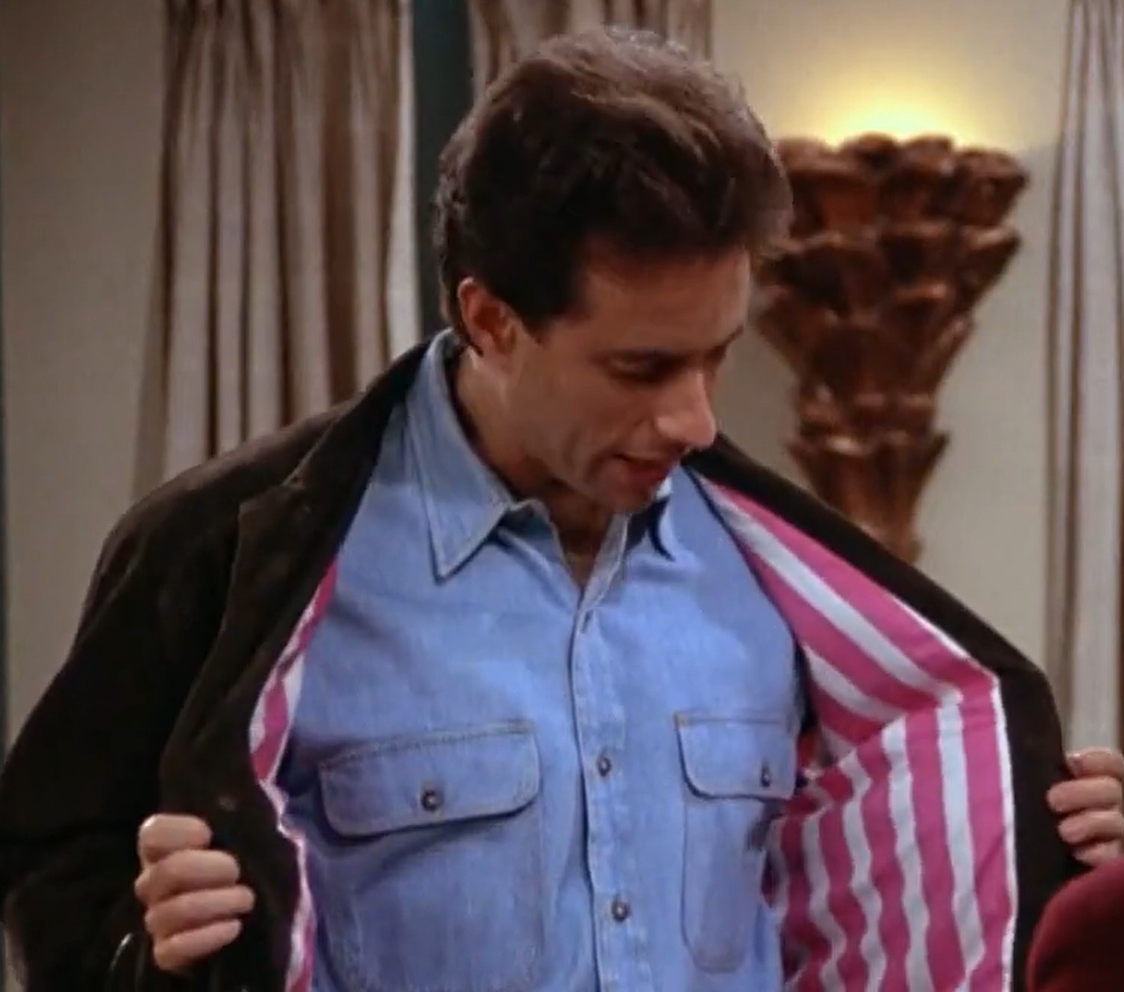 -->

$$81·81 \mod 7 = 2\mod 7$$